In [145]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import os


In [170]:
wor_dir='C:/Typhoon_IBF/Typhoon-Impact-based-forecasting-model/IBF-Typhoon-model/'
vulnerabilityfile=wor_dir+"data/model_input/df_predisasters.csv"
def calculate_entropy(df,varname,normalized: bool = False):
    """
    Calculates entropy and normalized entropy of list of elements that have specific frequency
    :param df: The df.
    :param var: var
    :param normalized: Calculate normalized entropy
    :return: entropy or (entropy, normalized entropy)
    """
    df['freq_count'] = df.groupby(varname)[varname].transform('count')
    df['prob']=df['freq_count']/(sum(df['freq_count'].values))
    frequencylist=list(df['freq_count'].values)
    entropy, normalized_ent, n = 0, 0, 0
    sum_freq = sum(frequencylist)
    for i, x in enumerate(frequencylist):
        p_x = float(frequencylist[i] / sum_freq)
        if p_x > 0:
            n += 1
            entropy += - p_x * np.log2(p_x)
    if normalized:
        if np.log2(n) > 0:
            normalized_ent = entropy / np.log2(n)
        return entropy, normalized_ent
    else:
        return entropy

cra =pd.read_csv(vulnerabilityfile)
cra['vulnerable_groups']=100*cra['vulnerable_groups']/cra["Total Pop"]
cra['pantawid_total_pop']=100*cra['pantawid_total_pop']/cra["Total Pop"]
 

In [172]:
cra=cra.dropna()
cra.iloc[:,1:]

#cra.drop(['Mun_Code'] , axis = 1, inplace = True)
 

,Number of Household,landslide_per,stormsurge_per,Bu_p_inSSA,Bu_p_LS,Red_per_LSbldg,Or_per_LSblg,Yel_per_LSSAb,RED_per_SSAbldg,OR_per_SSAbldg,...,Salvaged Roof/Strong Wall,Salvaged Roof/Light Wall,Salvaged Roof/Salvage Wall,Housing Units,vulnerable_groups,Female,Male,Total Pop,Total # of Active HHs,pantawid_total_pop
0,411,4.08,0.00,0.00,4.08,4.08,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,411.0,2.455357,825,967,1792,169.0,46.875000
1,8269,1.41,1.54,1.54,1.41,0.00,0.0,1.41,1.48,0.03,...,0.012958,0.000000,0.025917,7717.0,0.537017,16175,16040,32215,643.0,11.112836
2,7375,2.45,1.68,1.68,2.45,0.04,0.0,2.40,1.64,0.00,...,0.000000,0.000000,0.041929,7155.0,1.458122,15564,16052,31616,1489.0,26.372723
3,3568,2.88,1.51,1.51,2.88,0.41,0.0,2.47,1.44,0.00,...,0.000000,0.000000,0.000000,3534.0,1.117775,7422,7250,14672,528.0,20.597056
4,12797,0.03,0.03,0.03,0.03,0.03,0.0,0.00,0.00,0.00,...,0.008098,0.000000,0.000000,12348.0,0.605062,27695,27506,55201,1697.0,17.811272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,5055,3.54,2.11,2.11,3.54,1.58,0.0,1.96,2.11,0.00,...,0.180796,0.542387,0.080354,4978.0,3.008036,11331,11940,23271,1553.0,45.838168
1643,2392,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.041824,2391.0,4.025365,5201,5680,10881,821.0,48.589284
1644,3711,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,3691.0,4.398062,7873,8225,16098,1281.0,45.688905
1645,1656,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,1653.0,4.164273,3457,3507,6964,497.0,42.432510


In [173]:
##cra =pd.read_csv(vulnerabilityfile)
#cra.drop(['Mun_Code'] , axis = 1, inplace = True) #drop first two columns
#cra = cra[cra.columns.intersection(a)]
#calculate_entropy
x = cra.iloc[:,1:].values    
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)
cra_norm_mat = pd.DataFrame(x_scaled)
entropy_list=[]
for items in list(cra.columns):
    entropydf = calculate_entropy(cra,varname=items)
    entropy_list.append(entropydf)


In [176]:
from sklearn.preprocessing import StandardScaler
#cra=cra.dropna()
#cra.drop(['Mun_Code'] , axis = 1, inplace = True)
df_std = StandardScaler().fit_transform(cra.iloc[:,1:])
df_cov_matrix = np.cov(df_std.T)
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)

#print('Eigenvectors \n%s' %eig_vecs)
##print('\nEigenvalues \n%s' %eig_vals)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
##print('Eigenvalues in descending order:')
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print('Variance captured by each component is \n',var_exp)
print('Cumulative variance captured as we travel with each component \n',cum_var_exp)

Cumulative variance captured as we travel with each component 
 [ 18.87792025  32.70407897  43.43526792  52.97269429  59.39093338
  65.21560261  69.50308248  73.15711209  76.31792659  79.27229227
  81.89090474  84.33475765  86.32263194  88.10430275  89.72395316
  91.22203965  92.63126835  93.90895113  95.05691658  96.05406072
  96.91614518  97.73048745  98.50699858  99.11661903  99.50683073
  99.74932799  99.93458911  99.98142109  99.99636164  99.99867035
  99.99955644  99.99998763  99.9999942   99.99999781  99.99999988
 100.         100.         100.         100.        ]


In [179]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pcs = pca.fit_transform(df_std)
df_new = pd.DataFrame(data=pcs)#, columns={'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'})
#df_new[target’] = df1[‘Brand’] 
df_new['Mun_Code']=cra['Mun_Code']
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Mun_Code
0,-3.509706,1.320477,-2.146660,-2.473363,0.616071,-1.087843,2.011464,0.768388,0.315997,-0.203465,2.379797,-1.120857,0.642836,2.159337,0.172212,-0.036643,0.019186,0.042117,-0.780536,PH012801000
1,2.007476,-1.654347,0.695526,-2.367763,1.164982,-0.764973,-0.461125,-0.757339,0.175135,-0.008754,-0.763576,0.065844,-0.590432,0.401167,-0.247186,0.447185,-0.058749,0.014765,-0.254055,PH012802000
2,-0.414959,0.335742,0.548936,-2.047144,1.112959,-0.656065,-0.684529,-0.238848,-0.615159,-0.120324,-0.964064,0.203489,-0.909866,0.061737,-0.975301,0.401724,-0.055676,-0.088260,-0.235006,PH012803000
3,-1.168590,0.796098,0.039156,-3.251752,1.486602,-0.228938,-0.529688,-0.259471,-0.409492,-0.659990,-1.012173,0.224787,-1.561917,-0.053516,-0.593177,0.752564,0.096916,-0.241036,-0.289783,PH012804000
4,1.741710,-1.145167,-1.243212,-1.804605,-0.013448,-0.320120,-1.059528,-0.071795,0.595833,-0.197426,-0.010043,-0.085171,-0.719019,-0.146632,-0.475879,0.387275,0.073846,-0.050297,-0.128776,PH012805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,-4.412894,3.131082,0.039505,-0.992703,1.401202,1.062351,-0.725531,1.903538,-0.884855,1.504431,0.314537,-0.116185,0.095672,0.779116,0.485445,0.088039,-0.035219,0.348714,-0.395229,PH175906000
1636,-0.505656,-1.793519,1.136470,1.611419,0.256283,-1.041114,-1.305862,1.902895,-0.685846,-0.845073,-0.295999,0.440295,-0.170790,0.943290,0.686232,-0.783838,0.140484,-0.190091,0.278532,PH175907000
1637,-0.984243,-0.943450,1.346131,1.806906,0.223052,-1.031598,-2.355003,1.743833,-0.701732,-0.709816,-0.513390,0.522055,-0.248195,1.278354,0.941936,-1.139962,-0.021299,-0.037483,0.222952,PH175908000
1638,-0.666287,-1.727944,0.085226,0.953081,-0.267234,-0.710981,-0.379752,0.947669,-0.792166,-0.419671,-0.471935,0.404159,0.089129,0.222702,0.482755,0.256153,-0.252196,0.143220,-0.854463,PH175909000


In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pcs = pca.fit_transform(df_std)
df_new = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'})
#df_new[target’] = df1[‘Brand’] 
df_new.head()

,PC5,PC20,PC19,PC7,PC3,PC6,PC1,PC4,PC2,PC8,PC16,PC11,PC12,PC15,PC10,PC9,PC18,PC17,PC14,PC13
0,-3.048124,3.134617,-1.986679,2.204824,0.328622,-1.204359,-1.361607,1.181839,-1.492655,-0.416100,-0.674183,-1.138333,-2.158836,0.341213,1.592267,0.450474,0.003849,-0.762541,-0.862646,0.626763
1,-1.336723,-2.135700,0.708593,1.010221,-0.514334,-1.137931,-0.060208,-0.132251,0.541406,-0.089372,0.332983,-0.026739,0.879672,-0.534387,0.194035,0.157796,0.196711,-0.462229,0.439634,-0.241685
2,-1.443191,0.782126,0.484169,0.857363,-0.448604,-1.064272,0.470291,-0.480731,0.044416,0.218701,-0.081814,0.410555,1.030906,-0.765278,-0.499439,0.086176,0.097813,-0.374806,-0.416935,-0.241295
3,-2.219904,1.771842,-0.045657,1.626301,-0.133631,-1.244710,0.483074,0.112958,0.342148,0.121495,0.019550,0.318400,1.353108,-1.390003,-0.390752,-0.058780,0.270591,-0.343624,-0.203504,-0.165103
4,-0.756269,-1.537526,-1.147514,0.179192,0.532522,-0.141173,-0.533992,-0.081514,0.297204,0.053165,0.587692,-0.318956,0.474940,-0.665090,-0.419413,-0.007060,0.194074,0.002357,-0.645889,-0.142600


In [121]:
entropydf

10.420934151668483

In [ ]:
            
def derive_cra_entopy_weights_from_list(a):
    cra =pd.read_csv(vulnerabilityfile)
    cra.drop(['Mun_Code','typhoon', 'DAM_perc_dmg'] , axis = 1, inplace = True) #drop first two columns
    cra = cra[cra.columns.intersection(a)]
    x = cra.values    
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_scaled = min_max_scaler.fit_transform(x)
    cra_norm_mat = pd.DataFrame(x_scaled)
    cra_norm_mat_log = cra_norm_mat.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

    cra_norm_x_cra_mat_log = cra_norm_mat.mul(cra_norm_mat_log.values)
    
    one_minus_log_sample = -1/(np.log10(len(cra_norm_x_cra_mat_log[0]))) 
    eij = cra_norm_x_cra_mat_log.sum() * one_minus_log_sample
    dij = 1 - eij * -1
    weights = dij/dij.sum()
    weights_ls = weights.tolist()
    new_weights = ", \n".join("{}: {}".format(x, y) for x, y in zip(cra.columns, weights_ls))
    
    return print(new_weights)

In [7]:
cra =pd.read_csv(vulnerabilityfile)
cra

,Mun_Code,Number of Household,landslide_per,stormsurge_per,Bu_p_inSSA,Bu_p_LS,Red_per_LSbldg,Or_per_LSblg,Yel_per_LSSAb,RED_per_SSAbldg,...,Salvaged Roof/Strong Wall,Salvaged Roof/Light Wall,Salvaged Roof/Salvage Wall,vulnerable_groups,Female,Male,Total Pop,Total # of Active HHs,Total HH MEM_M,Total HH MEM_F
0,PH012801000,411,4.08,0.00,0.00,4.08,4.08,0.0,0.00,0.00,...,0.0,0.0,0.0,44,825,967,1792,169.0,439.0,401.0
1,PH012802000,8269,1.41,1.54,1.54,1.41,0.00,0.0,1.41,1.48,...,1.0,0.0,2.0,173,16175,16040,32215,643.0,1869.0,1711.0
2,PH012803000,7375,2.45,1.68,1.68,2.45,0.04,0.0,2.40,1.64,...,0.0,0.0,3.0,461,15564,16052,31616,1489.0,4444.0,3894.0
3,PH012804000,3568,2.88,1.51,1.51,2.88,0.41,0.0,2.47,1.44,...,0.0,0.0,0.0,164,7422,7250,14672,528.0,1579.0,1443.0
4,PH012805000,12797,0.03,0.03,0.03,0.03,0.03,0.0,0.00,0.00,...,1.0,0.0,0.0,334,27695,27506,55201,1697.0,5104.0,4728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,PH175913000,5055,3.54,2.11,2.11,3.54,1.58,0.0,1.96,2.11,...,9.0,27.0,4.0,700,11331,11940,23271,1553.0,5457.0,5210.0
1643,PH175914000,2392,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.0,1.0,438,5201,5680,10881,821.0,2717.0,2570.0
1644,PH175915000,3711,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.0,0.0,708,7873,8225,16098,1281.0,3736.0,3619.0
1645,PH175916000,1656,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.0,0.0,290,3457,3507,6964,497.0,1555.0,1400.0


In [66]:
a=['Bu_p_inSSA', 'Bu_p_LS', 'Red_per_LSbldg','Or_per_LSblg', 'Yel_per_LSSAb']
#test different values of a
#ls_flood_coping = ['']
#ls_flood_vulnerability = ['']
##ls_drought_coping = ['% improved water source', 'Travel time to nearest city', '% unemployed']
#ls_drought_vulnerability = ['Poverty incidence', 'Gini Index', '%illiteracy', '% improved water source', '% improved sanitation']
#ls_flood = ['% population U5', '% population 65+', 'Poverty incidence', '% strong wall type', 'Travel time to nearest city', '% improved sanitation']

In [8]:
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [9]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [50]:
# define the distribution
from scipy.stats import expon,lognorm,gamma,norm
# example of parametric probability density estimation
from matplotlib import pyplot
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

In [89]:
cra =pd.read_csv(vulnerabilityfile)
#cra.drop(['Mun_Code'] , axis = 1, inplace = True) #drop first two columns
x = cra.filter(['vulnerable_groups']).values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)
 


C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

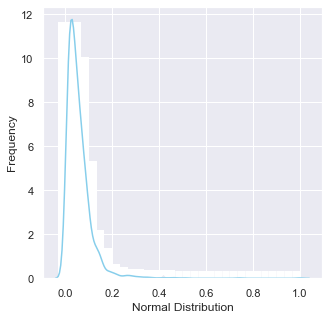

In [90]:
ax = sns.distplot(x_scaled.flatten(),
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [100]:
 
def cal_prob(df,varname):
    df['freq_count'] = df.groupby(varname)[varname].transform('count')
    df['prob']=df['freq_count']/(sum(df['freq_count'].values))
    

 

2835


In [ ]:
df['freq_count'] = df.groupby(varname)[varname].transform('count')
df['prob']=df['freq_count']/(sum(df['freq_count'].values))

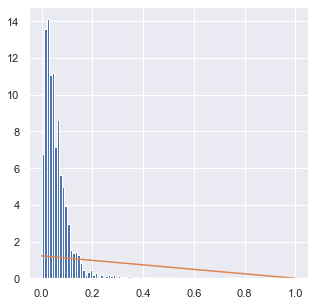

In [93]:
sample=x_scaled.flatten()

sample_mean=np.mean(sample)
sample_std=np.mean(sample)

 
s= 0.7495645491251124,
loc= -0.0050473103875926266,
scale= 0.04734081782075519

dist = lognorm(s,loc,scale)
values = np.linspace(0,1,2)
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=100, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

In [81]:
sample

array([0.00227708, 0.00895306, 0.02385758, ..., 0.03664027, 0.01500802,
       0.01412824])

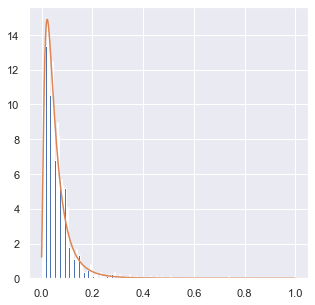

In [63]:


# sample probabilities for a range of outcomes
values = np.linspace(0,1,1647)
#values = [value for value in range(0.2, 0.3)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=200, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

In [76]:
np.array(probabilities).flatten()*(1/1647)

array([7.40748004e-04, 1.02796978e-03, 1.35283992e-03, ...,
       7.98939477e-08, 7.95834207e-08, 7.92742357e-08])

In [43]:
dist.pdf(0.1)

array([2.87867032])

In [66]:
1/1647

0.0006071645415907711

{'burr': {'c': 5.411199796024648,
  'd': 0.26250626574774194,
  'loc': -0.009196424810842617,
  'scale': 0.32531884996124444}}

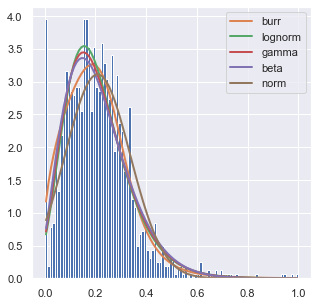

In [87]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(sample,
           distributions=['gamma',
                          'lognorm',
                          'norm',
                          "beta",
                          "burr",
                          "expon"])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [25]:
#'loc': -2.1134714018177956, 'scale': 67731679979.85335



In [ ]:
def calculate_entropy(frequency: list, normalized: bool = False):
        """
        Calculates entropy and normalized entropy of list of elements that have specific frequency
        :param frequency: The frequency of the elements.
        :param normalized: Calculate normalized entropy
        :return: entropy or (entropy, normalized entropy)
        """
        entropy, normalized_ent, n = 0, 0, 0
        sum_freq = sum(frequency)
        for i, x in enumerate(frequency):
            p_x = float(frequency[i] / sum_freq)
            if p_x > 0:
                n += 1
                entropy += - p_x * log(p_x, 2)
        if normalized:
            if log(n) > 0:
                normalized_ent = entropy / log(n, 2)
            return entropy, normalized_ent
        else:
            return entropy